In [1]:
# HHLアルゴリズムを量子回路で構築するソースコード
# 必要なモジュールをインポートする
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.tools.visualization import plot_histogram
import numpy as np

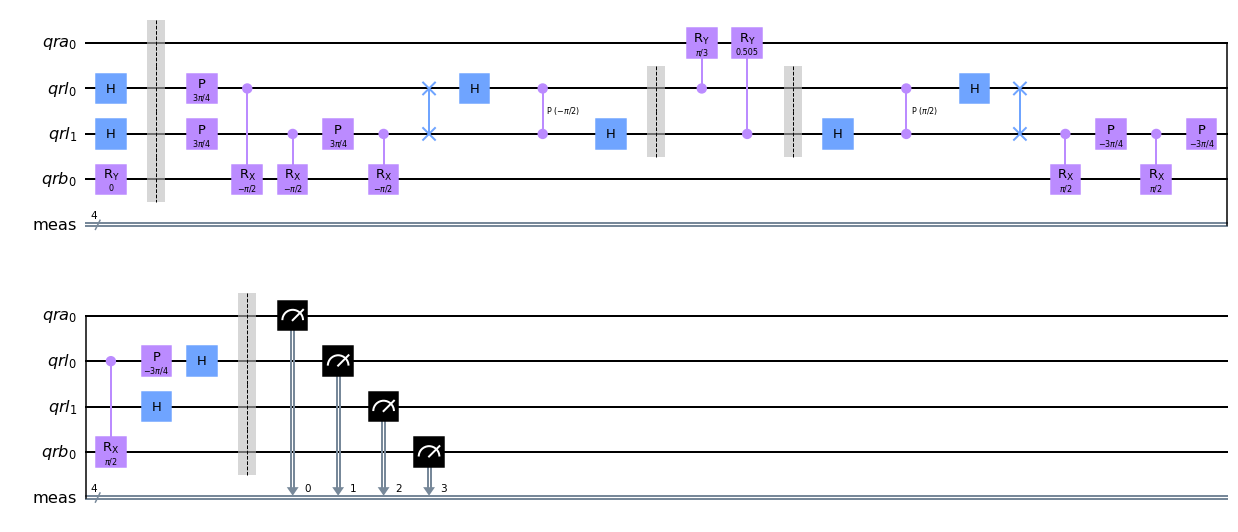

In [2]:
# ビット数、tの値
nb, nl, theta = 1, 2, 0
t = 2*np.pi*3/8

# 量子レジスタの準備
qrb = QuantumRegister(nb, name='qrb')
qrl = QuantumRegister(nl, name='qrl')
qra = QuantumRegister(1, name='qra')

# 量子回路
qc = QuantumCircuit(qra, qrl, qrb)
# bの状態を作成
qc.ry(2*theta, qrb[0])
    
# 量子位相推定
for qu in qrl:
    qc.h(qu)

qc.barrier()
qc.p(t, qrl[0])
qc.crx(-2/3*t, qrl[0], qrb[0])
qc.p(t, qrl[1])
qc.crx(-2/3*t, qrl[1], qrb[0])
qc.p(t, qrl[1])
qc.crx(-2/3*t, qrl[1], qrb[0])
# 逆量子フーリエ変換
qc.swap(qrl[0], qrl[1])
qc.h(qrl[0])
qc.cp(-np.pi/2,qrl[0],qrl[1])
qc.h(qrl[1])
# 固有値の逆数の回転
c = 1/3
t1 = 2*np.arcsin(1/2)
t2 = 2*np.arcsin(1/4)

qc.barrier(qrl)
qc.cry(t1, qrl[0], qra[0])
qc.cry(t2, qrl[1], qra[0])
qc.barrier(qrl)
# 量子フーリエ変換
qc.h(qrl[1])
qc.cp(np.pi/2,qrl[0],qrl[1])
qc.h(qrl[0])
qc.swap(qrl[0], qrl[1])

qc.crx(2/3*t, qrl[1], qrb[0])
qc.p(-t, qrl[1])
qc.crx(2/3*t, qrl[1], qrb[0])
qc.p(-t, qrl[1])
qc.crx(2/3*t, qrl[0], qrb[0])
qc.p(-t, qrl[0])

for qu in qrl:
    qc.h(qu)
# 全量子ビット測定する。
qc.measure_all()
# 描画する。
qc.draw('mpl')

{'1001': 10, '0001': 136, '1000': 2, '0000': 852}


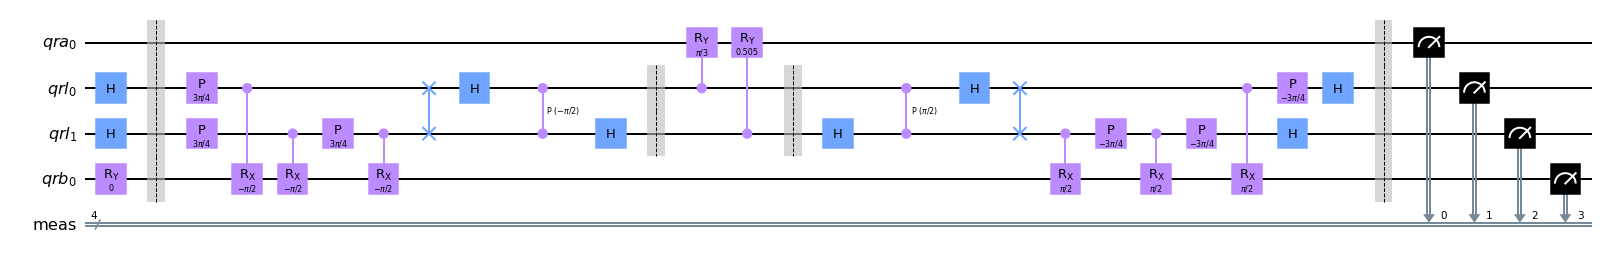

In [3]:
# マシンを選択して実行する。
backend = Aer.get_backend('qasm_simulator')
shots = 1000
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()
# 答えを出力する。
print(answer)
qc.draw(output='mpl', fold=100)